# Exercise for k means tutorial

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

<img src='iris.png' width=200 height=200>

# 1. Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['flower'] = iris.target
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# 3. KMeans Model

In [7]:
km = KMeans(n_clusters=3)

In [8]:
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [13]:
df1 = df[df.cluster.eq(0)]
df2 = df[df.cluster.eq(1)]
df3 = df[df.cluster.eq(2)]

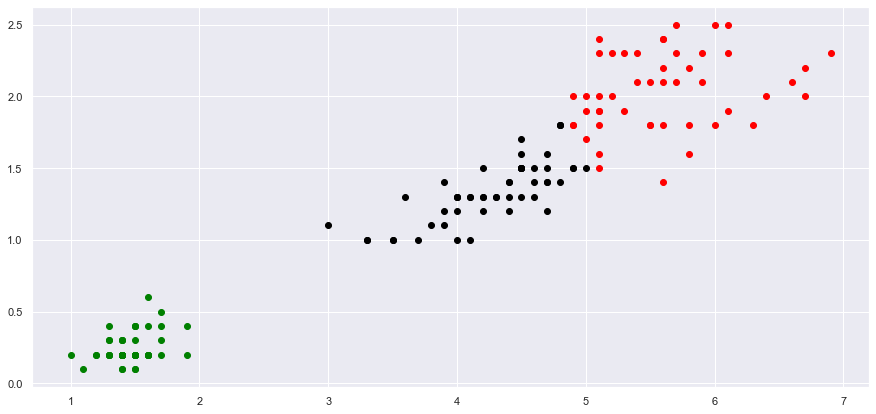

In [19]:
plt.figure(figsize=(15,7))
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'],color='black')

there is no need for preprocessing

# 4. Elbow Plot

In [15]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_) # km.inertia is going to give the sum of squared error

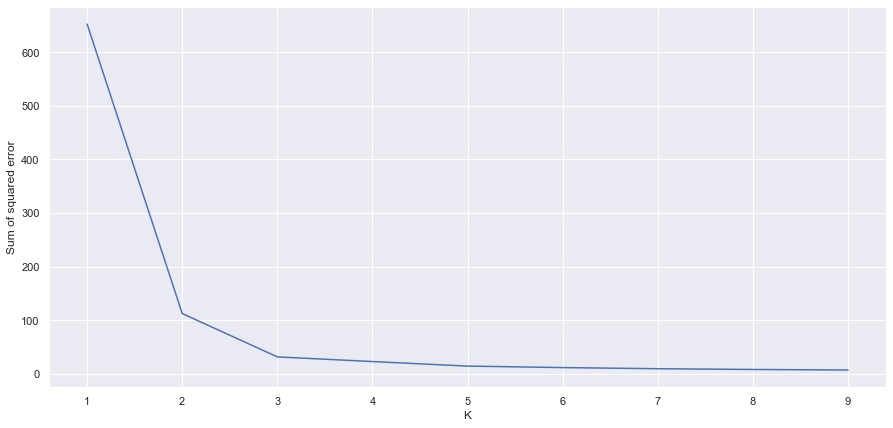

In [20]:
plt.figure(figsize=(15,7))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse);